<a href="https://colab.research.google.com/github/mayorga09/Mineria_de_Datos/blob/main/Programa_Presentaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SERIES DE TIEMPO

In [7]:
library(tidyverse)


In [8]:
library(tidyverse)

Leer csv

In [14]:
raw_data <- read_csv('/content/2020-02.csv')

Rows: 686327 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Genero_Usuario, Fecha_Retiro, Hora_Retiro, Fecha_Arribo, Hora_Arribo
dbl (4): Edad_Usuario, Bici, Ciclo_Estacion_Retiro, Ciclo_Estacion_Arribo


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Procedimiento de datos

In [37]:
viajes_diarios <- raw_data %>% 
      mutate(fecha_hora = dmy_hms(paste(Fecha_Retiro, Hora_Retiro))) %>% 
      filter(fecha_hora >= as.Date('2020-02-24'),
             fecha_hora <= as.Date('2020-02-29')) %>%
      group_by(horas=floor_date(fecha_hora,unit = "hour")) %>%
      summarise(conteo=n())       

In [38]:
viajes_diarios

horas,conteo
<dttm>,<int>
2020-02-24 00:00:00,34
2020-02-24 01:00:00,7
2020-02-24 02:00:00,5
2020-02-24 05:00:00,145
2020-02-24 06:00:00,697
2020-02-24 07:00:00,1809
2020-02-24 08:00:00,3158
2020-02-24 09:00:00,2251
2020-02-24 10:00:00,1155


Rellenando los Ceros

In [39]:
horas_completas <- tibble(
  horas=seq(
    floor_date(min(viajes_diarios$horas),unit = "hour"),
    floor_date(max(viajes_diarios$horas),unit="hour"),
    by="hour")
)

In [40]:
horas_completas

horas
<dttm>
2020-02-24 00:00:00
2020-02-24 01:00:00
2020-02-24 02:00:00
2020-02-24 03:00:00
2020-02-24 04:00:00
2020-02-24 05:00:00
2020-02-24 06:00:00
2020-02-24 07:00:00
2020-02-24 08:00:00


Left Join Con Horas

In [41]:
viajes_hora<-horas_completas %>%
  group_by(horas_redondeadas=floor_date(horas,unit = "hour")) %>%
  left_join(viajes_diarios)  %>%
  mutate(conteo=ifelse(is.na(conteo),0,conteo))              

Joining, by = "horas"



In [42]:
viajes_hora

horas,horas_redondeadas,conteo
<dttm>,<dttm>,<dbl>
2020-02-24 00:00:00,2020-02-24 00:00:00,34
2020-02-24 01:00:00,2020-02-24 01:00:00,7
2020-02-24 02:00:00,2020-02-24 02:00:00,5
2020-02-24 03:00:00,2020-02-24 03:00:00,0
2020-02-24 04:00:00,2020-02-24 04:00:00,0
2020-02-24 05:00:00,2020-02-24 05:00:00,145
2020-02-24 06:00:00,2020-02-24 06:00:00,697
2020-02-24 07:00:00,2020-02-24 07:00:00,1809
2020-02-24 08:00:00,2020-02-24 08:00:00,3158


Grafica de Lineas Inicial

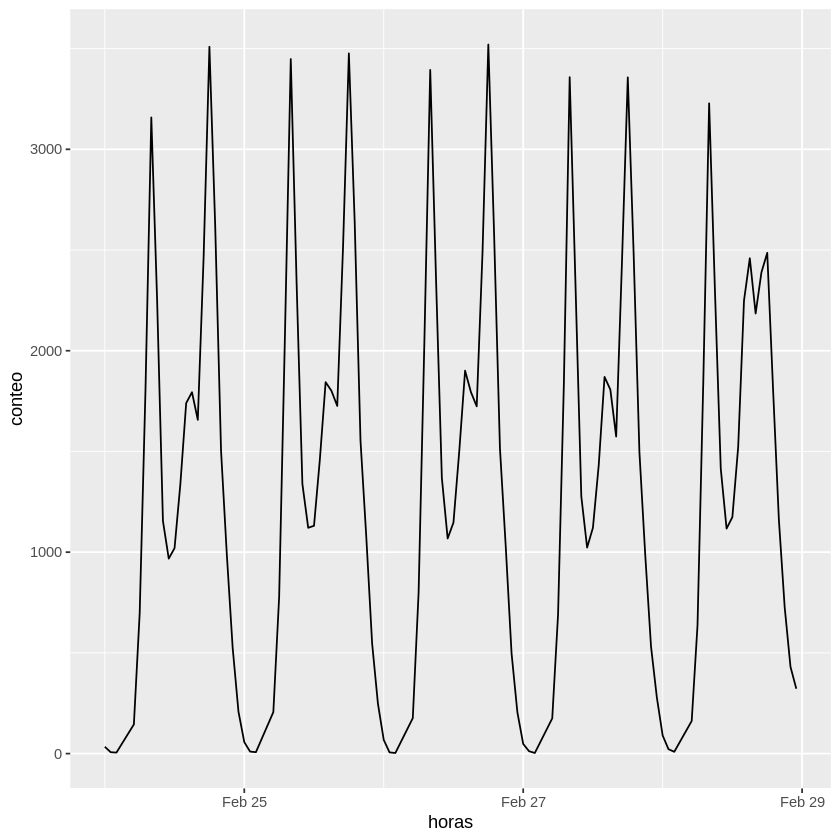

In [43]:
ggplot(data = viajes_diarios,
       aes(x=horas, 
           y=conteo))+
   geom_line()            